We first need to load the embeddings dataset

In [1]:
from numpy import load
data = load('compressed_face-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=92, test=25


The data requires minor preparation prior to modelling.

* It is good practice to normalise the face embedding vectors because they are often compared to each other using a distance metric.

* Therefore, vector normalisation means scaling the values until the lenght or magnitude of the vectors is 1 or unit lenght. The way this can be achieved is through the Normalizer class in scikit-learn.

In [3]:
from sklearn.preprocessing import Normalizer
in_encoder = Normalizer()
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

Now the string target variables for each celebrity name need to be converted to integers. This can be done using the LabelEncoder class in scikit-learn.

In [4]:
from sklearn.preprocessing import LabelEncoder
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

Next we need to fit the model.

The most common way is to use Linear Support Vector Machine (SVM) when working with normalised face embedding inputs. The reason for taht is that it is very effective at separating the face embedding vectors.

That can be done by using the SVC class in scikit-learn and setting the kernel attribute to linear.

Additionally, we may also want probabilities later when making predictions, which can be configured by setting probability to True.

In [12]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Now we can evaluate the model.

This can be achieved by using the fit model to make a prediction for each example in the train and test datasets and then calculating the classification accuracy.

In [13]:
from sklearn.metrics import accuracy_score
#predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
#score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
#summarise
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


# Plotting

First we need to load the faces in the test dataset. We could also load the originals to make it more interesting.

In [14]:
data = load('compressed_data.npz')
testX_faces = data['arr_2']

Now we need to select a random example from the test set, then get the embeddings, face pixels, expected class prediction and the corresponding name for the class.

In [15]:
from random import choice
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

Next we can use the face embeddings as an input to make a single prediction with the fit model. We can predict both the class integer and the probability of the prediction.

In [16]:
from numpy import expand_dims
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

Now to get the name for the predicted class integer and the probability for this prediction.

In [17]:
class_index = yhat_class[0]
class_probability = yhat_prob[0, class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)

Now to print all the info:

In [18]:
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

Predicted: elton_john (90.911)
Expected: elton_john


Plot the face pixels along with the predicted name and probability

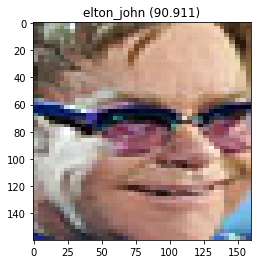

In [20]:
from matplotlib import pyplot
%matplotlib inline
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()